In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Data

### *Read in the Data...*

Data from https://hastie.su.domains/ElemStatLearn/

Normalized handwritten digits, automatically
scanned from envelopes by the U.S. Postal Service. The original
scanned digits are binary and of different sizes and orientations; the
images  here have been deslanted and size normalized, resulting
in 16 x 16 grayscale images (Le Cun et al., 1990).

The first column stands for the response (Y ) and the other columns stand for the independent variables (Xi’s).

In [44]:
import gzip

### TESTING DATA...
with gzip.open('Data/zip.test.gz', 'rb') as f:
    df_testing = pd.read_csv(f,delim_whitespace=True, header=None)
    
### TRAINING DATA...
with gzip.open('Data/zip.train.gz', 'rb') as f:
    df_training = pd.read_csv(f,delim_whitespace=True, header=None)

In [45]:
df_testing.head(2)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.0,-1.0,-0.948,-0.561,0.148,0.384,...,-1.0,-0.908,0.43,0.622,-0.973,-1.0,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.0,-1.000,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0


In [46]:
df_training.head(2)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0


### *Separate into 2 and 7's only !*

Want to build a model that can determine a 2 vs. a 7 value !

In [53]:
df_testing.shape

(2007, 257)

In [77]:
df_testing27 = df_testing[(df_testing[0] == 2) |
                          (df_testing[0] == 7)].reset_index(drop=True)

In [78]:
df_testing27.shape

(345, 257)

In [138]:
df_testing27[5:6] # First row should plot a 2 !

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
5,7,-1.0,-0.99,0.7,0.283,-0.131,-0.598,-1.0,-1.0,-1.0,...,-0.7,0.734,-0.261,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [108]:
# Turn the first row into an array
# need to drop the first column of the above df becuase that is the answer!
# Turn this into an array to be able to reshape it as a 16x16 image !
example2 = np.array(df_testing27.loc[:0, df_testing27.columns !=0].values.flatten().tolist())

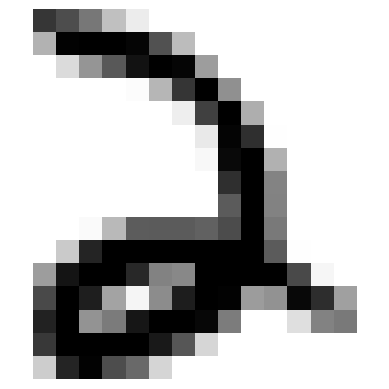

In [109]:
def plot_digit(image_data):
    image = image_data.reshape(16, 16)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plot_digit(example2)
plt.show()

### *Split Testing Data to X and y*

In [126]:
y_test = np.array(df_testing27.iloc[:,0].tolist()) # List of the answers

In [127]:
X_test = np.array(df_testing27.drop(columns = 0)) # list of the data

## Linear Regression Model

In [128]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_test, y_test)

SGDClassifier(random_state=1)